In [6]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import fisheye_to_perspective_utils

In [7]:
A_DPATH = Path('/gws/nopw/j04/iecdt/computer-vision-data/cam_a/imgs')
B_DPATH = Path('/gws/nopw/j04/iecdt/computer-vision-data/cam_b/imgs')

In [8]:
list(A_DPATH.glob('*.png'))[0]

PosixPath('/gws/nopw/j04/iecdt/computer-vision-data/cam_a/imgs/1691388010.png')

In [9]:
print(len(list(A_DPATH.glob('*.png'))), len(list(B_DPATH.glob('*.png'))))

14356 14470


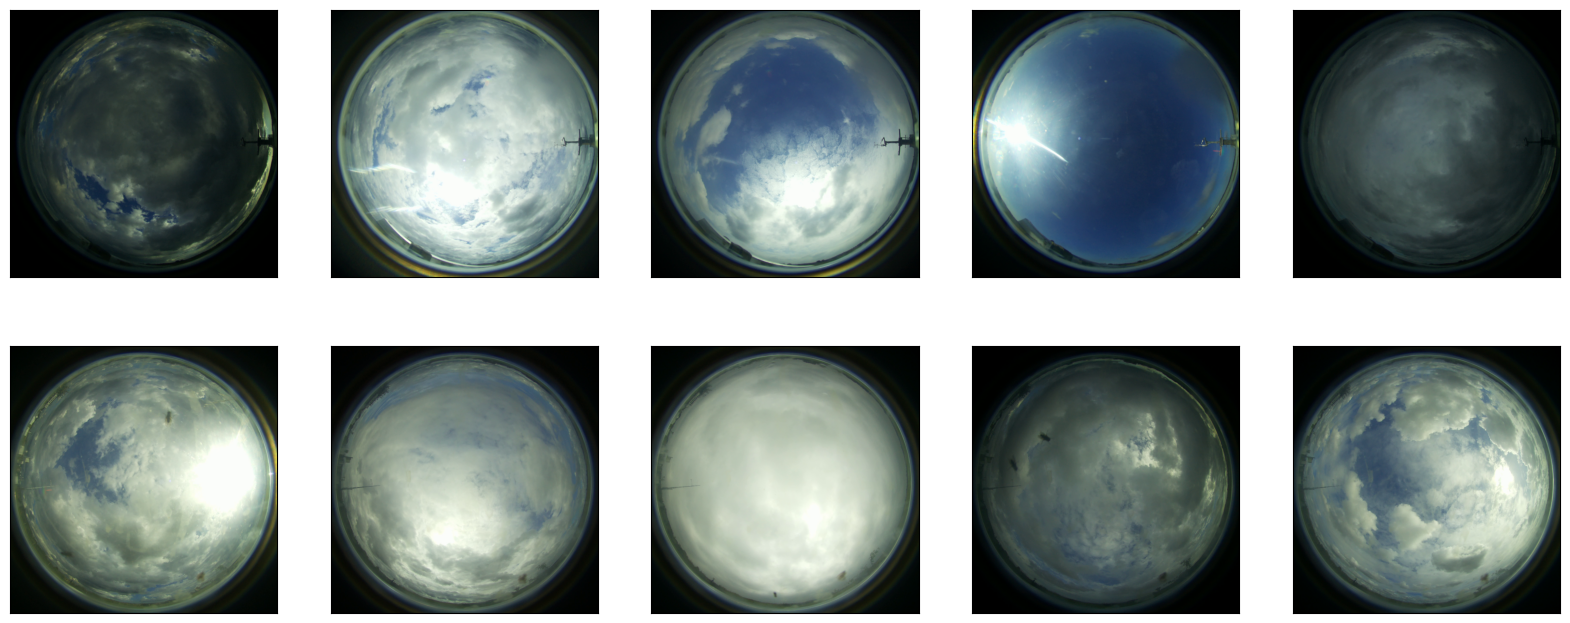

In [10]:
#Plot camera A (top row) and B (bottom row) images
#The images aren't matched up
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])
    
for i in range(5):
    n = np.random.randint(0,len(list(A_DPATH.glob('*.png'))))
    ax[0,i].imshow(plt.imread((list(A_DPATH.glob('*.png'))[n])))
    ax[1,i].imshow(plt.imread((list(B_DPATH.glob('*.png'))[n])))

### Camera Data Processing

In [11]:
#For each camera, create a list of all the filenames
A_filenames = []
B_filenames = []

for item in list(A_DPATH.glob('*.png')):
    #print(item.parts[-1])
    A_filenames.append(item.parts[-1])

for item in list(B_DPATH.glob('*.png')):
    #print(item.parts[-1])
    B_filenames.append(item.parts[-1])


In [12]:
#Find common filenames between the two cameras and create a list of those names
#Vast majority of images from each camera have a match

common = [item for item in A_filenames if item in B_filenames]
len(common)

13760

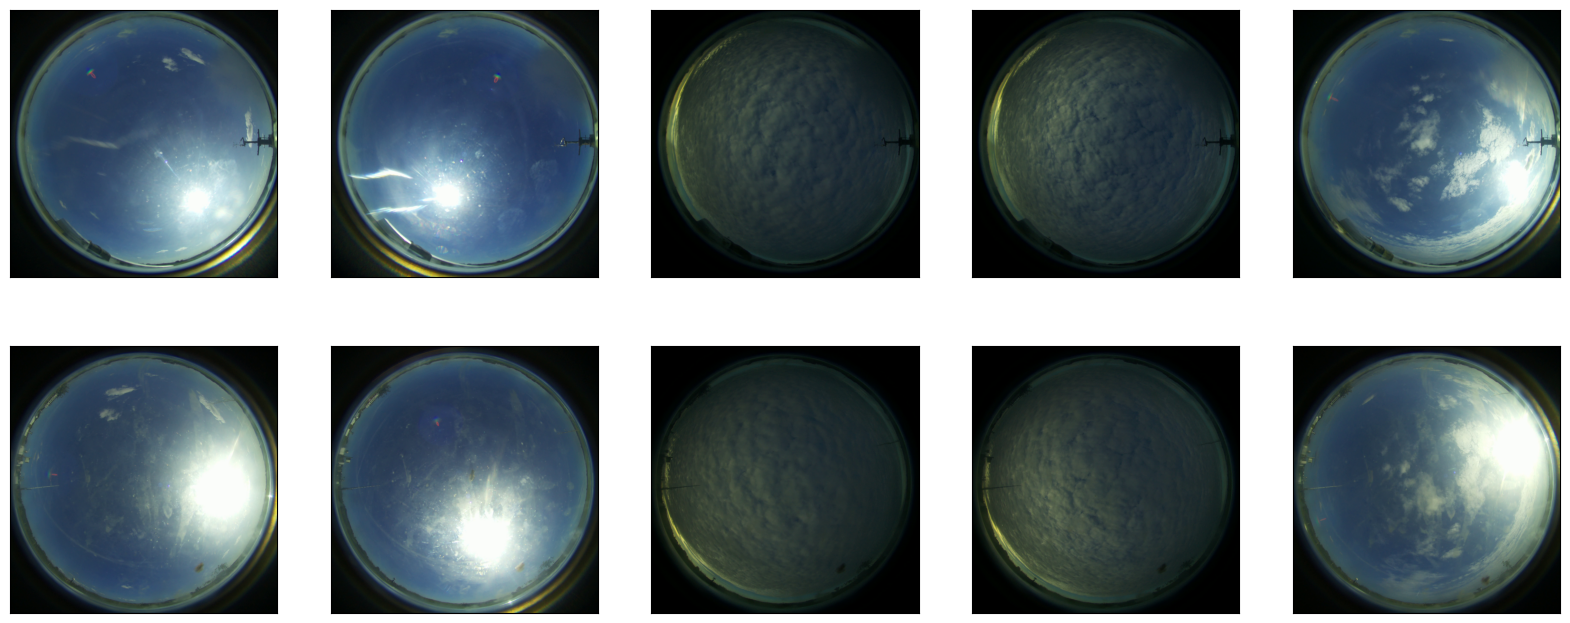

In [13]:
#Plot matched camera A (top row) and B (bottom row) images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])
    
for i in range(5):
    n = np.random.randint(0,len(common))
    ax[0,i].imshow(plt.imread(A_DPATH / common[n]))
    ax[1,i].imshow(plt.imread(B_DPATH / common[n]))


In [14]:
#Extract the camera parameters
from fisheye_to_perspective_utils import extract_cube_map
import yaml

with open("/gws/nopw/j04/iecdt/computer-vision-data/fisheye_calib_A.yml", 'r') as f:
    calib_A = yaml.safe_load(f)

with open("/gws/nopw/j04/iecdt/computer-vision-data/fisheye_calib_B.yml", 'r') as f:
    calib_B = yaml.safe_load(f)

In [33]:
#Get rotations
transform = np.loadtxt('/gws/nopw/j04/iecdt/computer-vision-data/T_rel.txt')
transform

print(transform[0,0], np.rad2deg(np.arccos(transform[0,0])), np.rad2deg(np.arctan(transform[0,-1]/transform[1,-1])))

0.7325527461463054 42.89917114852312 -4.107031489484138


tensor([[ 143.7343, 1396.9594],
        [1467.5994, 2925.6501],
        [2996.2900, 1601.7850],
        [1672.4250,   73.0942],
        [1570.0122, 1499.3722]])
tensor([[ 391.6121, 2451.5332],
        [2377.8687, 2667.5854],
        [2593.9209,  681.3287],
        [ 607.6642,  465.2765],
        [1492.7665, 1566.4309]])


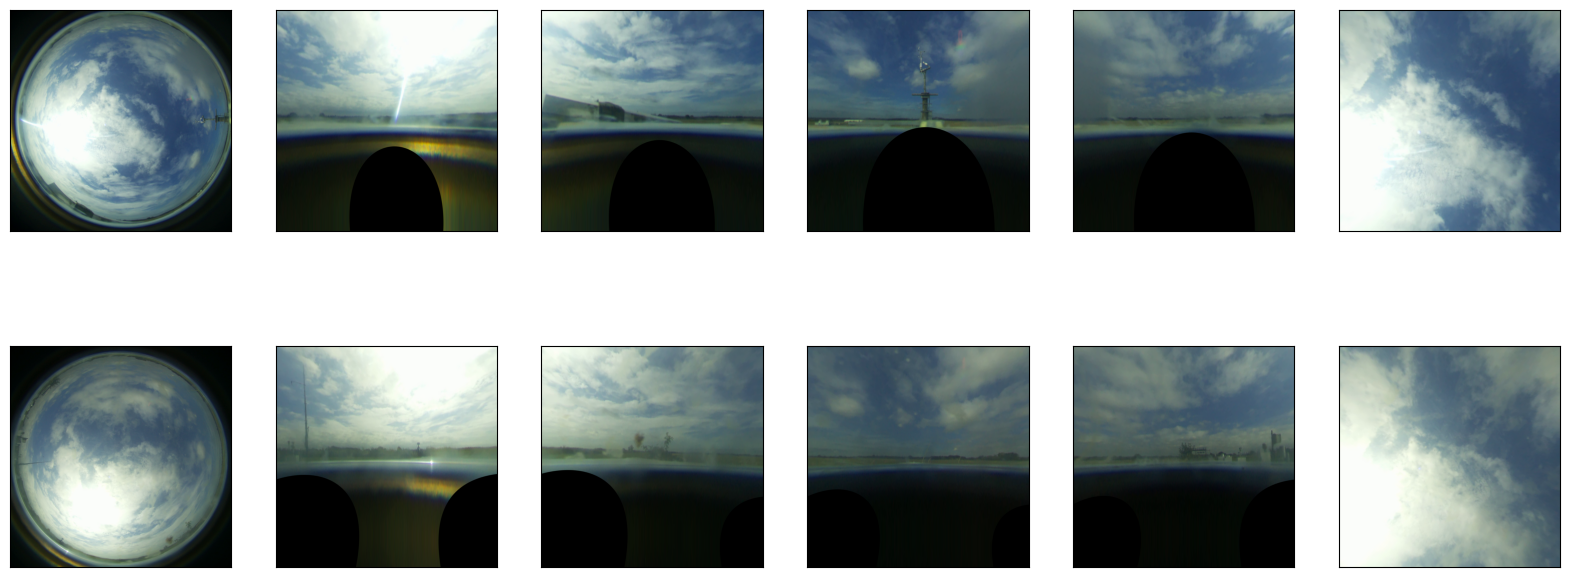

In [34]:
#Get an example image and plot the undistorted rotations for camera A (top row) and B (bottom row)

image_index = 2000

fig, ax = plt.subplots(2, 6, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])

#Camera A

img_a = extract_cube_map(plt.imread(A_DPATH / common[image_index]), calib_A, rotate=-4.107031489484138)

ax[0,0].imshow(plt.imread(A_DPATH / common[image_index]))
for i in range(0, 5):
    ax[0,i+1].imshow(img_a[i])

#Camera B

img_b = extract_cube_map(plt.imread(B_DPATH / common[image_index]), calib_B, rotate=42.89917114852312-4.107031489484138)

ax[1,0].imshow(plt.imread(B_DPATH / common[image_index]))
for i in range(0, 5):
    ax[1,i+1].imshow(img_b[i])

In [36]:
common[i]

'1691388010.png'

In [53]:
for i in range(5):
    img_a = extract_cube_map(plt.imread(A_DPATH / common[i]), calib_A, rotate=-4.107031489484138)
    img_b = extract_cube_map(plt.imread(B_DPATH / common[i]), calib_B, rotate=42.89917114852312-4.107031489484138)
    plt.imsave(Path('dataset/cam_a/' + common[i]), img_a[-1])
    plt.imsave(Path('dataset/cam_b/' + common[i]), img_b[-1])


tensor([[ 143.7343, 1396.9594],
        [1467.5994, 2925.6501],
        [2996.2900, 1601.7850],
        [1672.4250,   73.0942],
        [1570.0122, 1499.3722]])
tensor([[ 391.6121, 2451.5332],
        [2377.8687, 2667.5854],
        [2593.9209,  681.3287],
        [ 607.6642,  465.2765],
        [1492.7665, 1566.4309]])
tensor([[ 143.7343, 1396.9594],
        [1467.5994, 2925.6501],
        [2996.2900, 1601.7850],
        [1672.4250,   73.0942],
        [1570.0122, 1499.3722]])
tensor([[ 391.6121, 2451.5332],
        [2377.8687, 2667.5854],
        [2593.9209,  681.3287],
        [ 607.6642,  465.2765],
        [1492.7665, 1566.4309]])
tensor([[ 143.7343, 1396.9594],
        [1467.5994, 2925.6501],
        [2996.2900, 1601.7850],
        [1672.4250,   73.0942],
        [1570.0122, 1499.3722]])
tensor([[ 391.6121, 2451.5332],
        [2377.8687, 2667.5854],
        [2593.9209,  681.3287],
        [ 607.6642,  465.2765],
        [1492.7665, 1566.4309]])
tensor([[ 143.7343, 1396.9594],
  